In [1]:
import os
import sys

HOME = os.environ["HOME"]
PICNIX = "pic-nix"
workdir = "large0/test/shock2d"
profile = "test/data/profile.msgpack"

if PICNIX is not None:
    fullpath = os.sep.join([HOME, PICNIX, "script"])
    if os.path.exists(fullpath):
        sys.path.append(fullpath)
        print("Added {} to module search path".format(fullpath))
    else:
        print("Directory {} does not exist.".format(fullpath))

if workdir is not None:
    fullpath = os.sep.join([HOME, workdir])
    if os.path.exists(fullpath):
        os.chdir(fullpath)
    else:
        print("Directory {} does not exist.".format(fullpath))
print("Current working directory: {}".format(os.getcwd()))

import shock

Added /home/b/b36286/pic-nix/script to module search path
Current working directory: /LARGE0/gr20001/b36286/test/shock2d


In [2]:
run = picnix.Run(profile)
step = 400000

## Summary

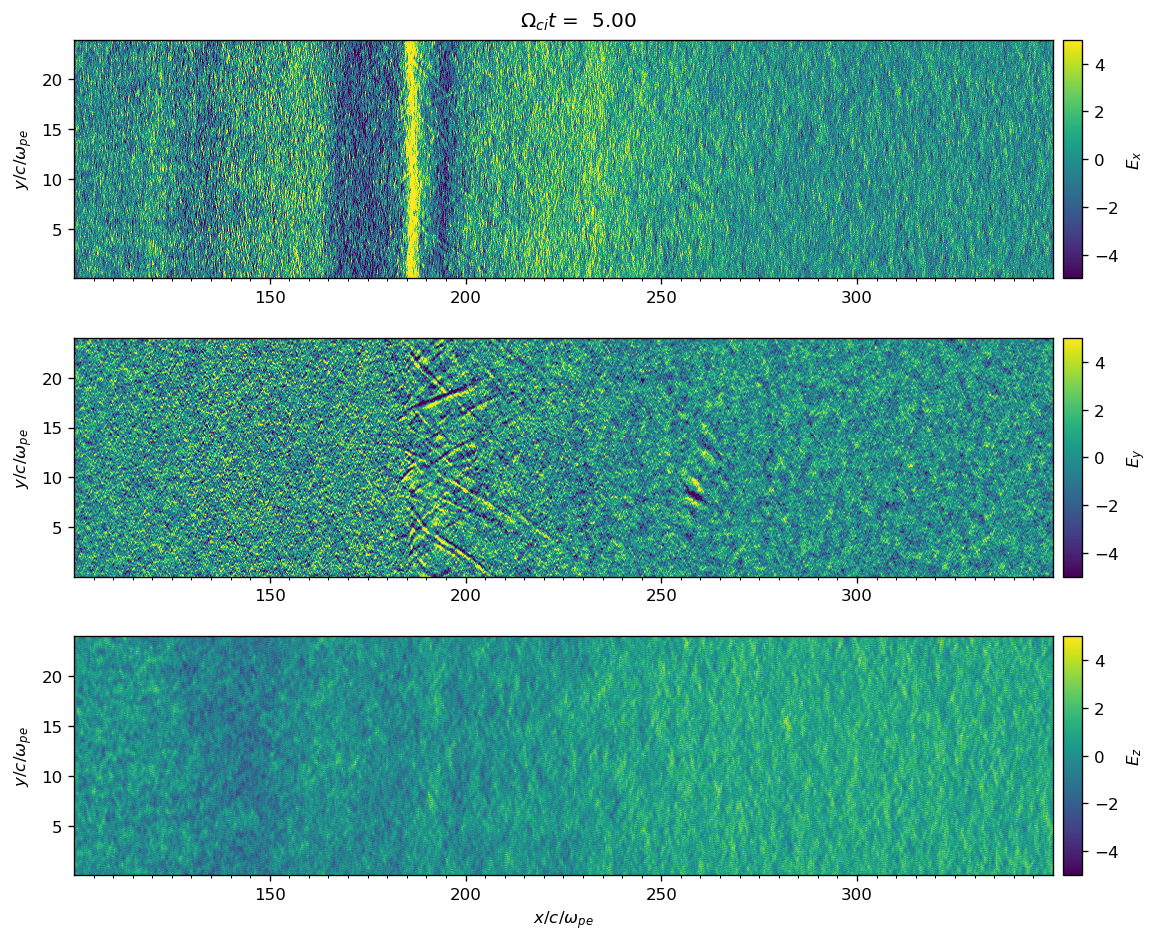

In [3]:
shock.summary_efield_2d(run, step, vlim=((-5, +5), (-5, +5), (-5, +5)), xlim=(100, 350))

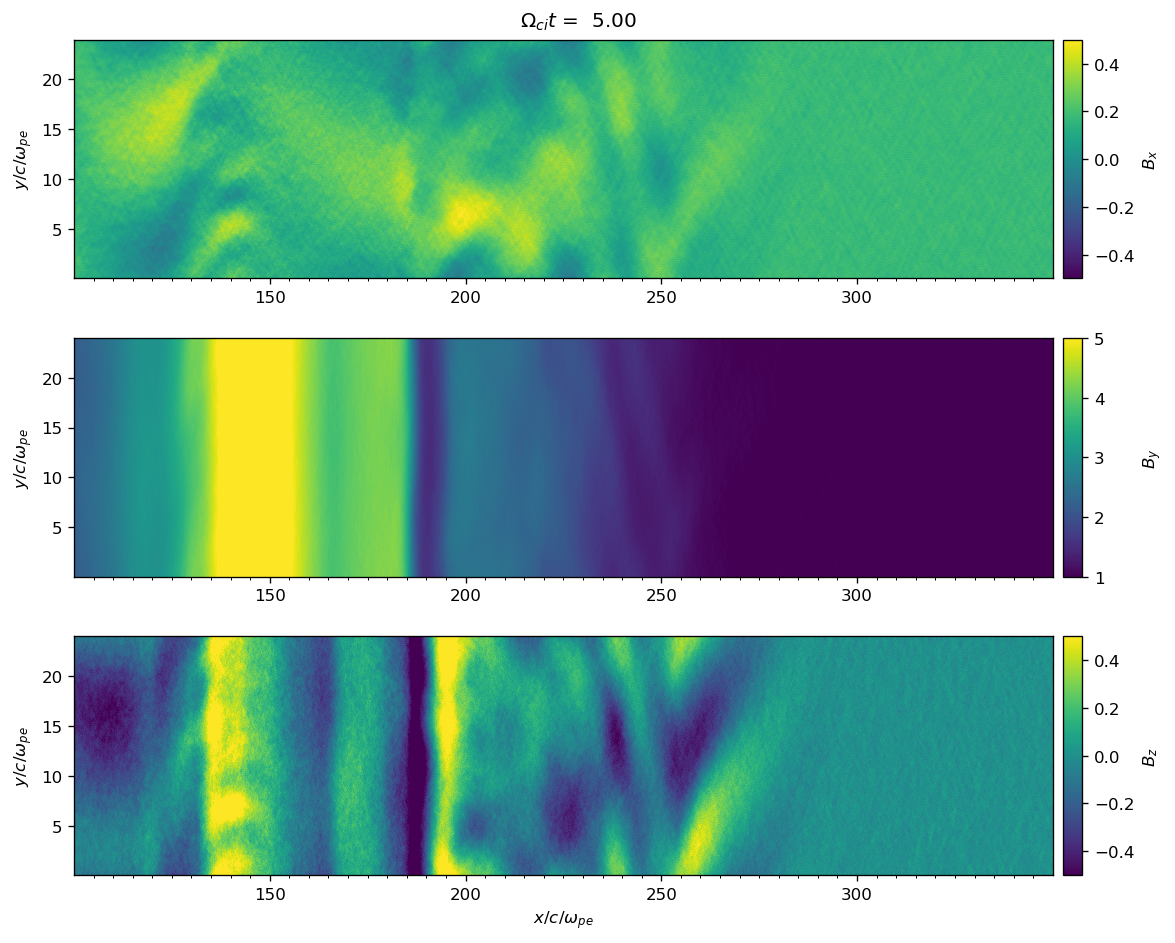

In [4]:
shock.summary_bfield_2d(run, step, vlim=((-0.5, +0.5), (1.0, +5.0), (-0.5, +0.5)), xlim=(100, 350))

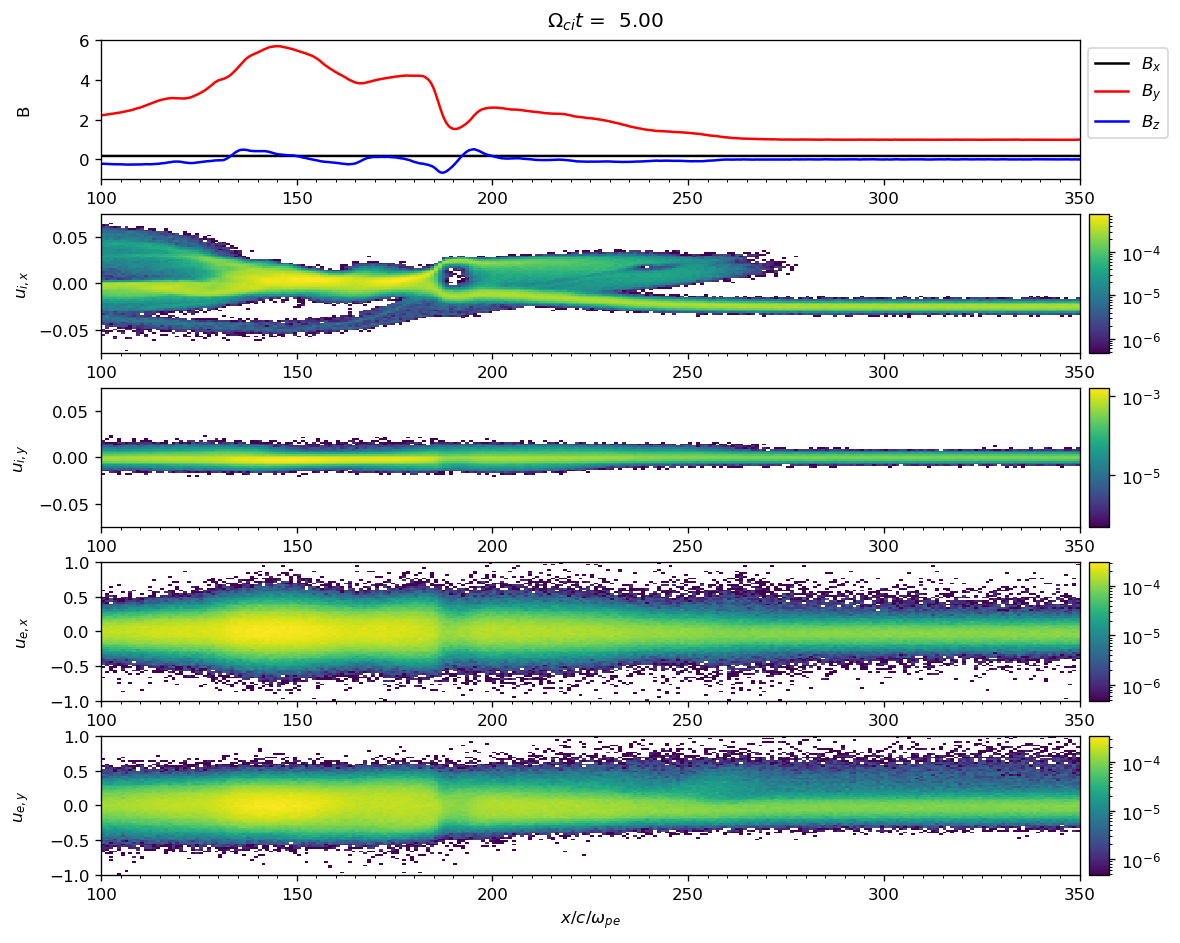

In [5]:
ele_psd, ion_psd = shock.summary_plot_1d(run, step, xbine=(100, 350, 251))

## Velocity Distribution Function

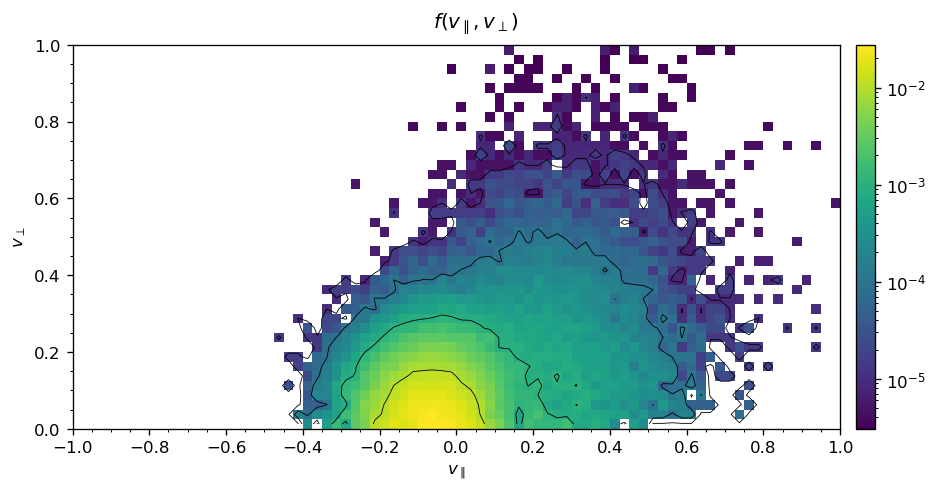

In [6]:
energy_dist, velocity_dist = shock.calc_velocity_dist(run, step, 0, 250, 270)
shock.summary_plot_velocity_dist(velocity_dist)

Text(0, 0.5, '$E dN/dE$')

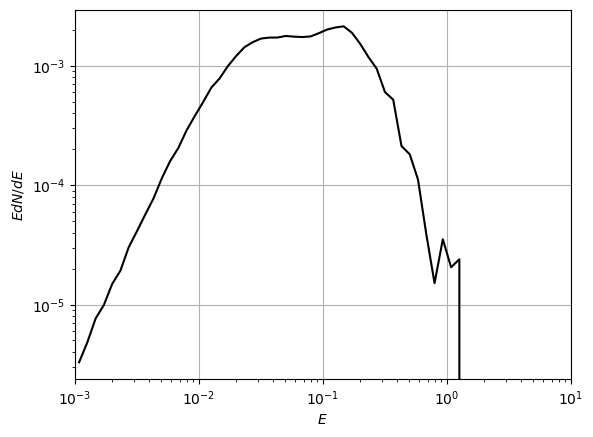

In [7]:
energy = energy_dist["energy"]
dist = energy_dist["dist"]
plt.loglog(energy, energy*dist, 'k-')
plt.grid()
plt.xlim(1e-3, 1e+1)
plt.xlabel(r"$E$")
plt.ylabel(r"$E dN/dE$")